In [124]:
import os
import cv2
import skimage
from skimage.exposure import histogram, equalize_adapthist
import matplotlib.pyplot as plt
import numpy as np

# 1. 读取图像

In [4]:
PATHS = {'normal' : './data/Data/train/NORMAL/',
        'pneumonia' : './data/Data/train/PNEUMONIA/',
       }

In [40]:
num_sample = 10
img_normal = []
img_bacteria = []
img_virus = []
for path in PATHS:
    if path == 'normal':
        img_paths = os.listdir(PATHS[path])
        for i, img_path in enumerate(img_paths):
            img = cv2.imread(PATHS[path] + img_path)
            img_normal.append(img)
            print('img_normal', str(len(img_normal)))
            if len(img_normal) >= num_sample: break;
    else:
        img_paths = os.listdir(PATHS[path])  
        for i, img_path in enumerate(img_paths):          
            if 'bacteria' in img_path and len(img_bacteria) < num_sample:
                img = cv2.imread(PATHS[path] + img_paths[i])
                img_bacteria.append(img)
                print('img_bacteria', str(len(img_bacteria)))
            elif 'virus' in img_path and len(img_virus) < num_sample:
                img = cv2.imread(PATHS[path] + img_paths[i])
                img_virus.append(img)
                print('img_virus', str(len(img_virus)))
            if len(img_bacteria) >= num_sample and len(img_virus) >= num_sample: break;            

img_normal 1
img_normal 2
img_normal 3
img_normal 4
img_normal 5
img_normal 6
img_normal 7
img_normal 8
img_normal 9
img_normal 10
img_bacteria 1
img_virus 1
img_virus 2
img_bacteria 2
img_virus 3
img_bacteria 3
img_bacteria 4
img_bacteria 5
img_virus 4
img_bacteria 6
img_bacteria 7
img_virus 5
img_bacteria 8
img_bacteria 9
img_bacteria 10
img_virus 6
img_virus 7
img_virus 8
img_virus 9
img_virus 10


In [119]:
def draw_Imgs(Imgs, figsize=[10, 10], method='plot'):
    '''
    Function:
        - to draw each img in Imgs
    Parameters:
        - Imgs: List, input images
        - figsize, the size of Figure
        - method, 'plot', 'imshow', 'hist'
    Return:
        - None
    '''
    num = len(Imgs)
    x, y = int(np.floor(np.sqrt(num))), int(np.ceil(num/np.sqrt(num)))
    fig, axes = plt.subplots(x, y, figsize=figsize)
    for i in range(x):
        for j in range(y):
            index = i * x + j + 1
            if index >= num: break;
            if method == 'plot':
                axes[i][j].plot(Imgs[index])
            elif method == 'imshow':
                axes[i][j].imshow(Imgs[index])
            elif method == 'hist':
                axes[i][j].bar(range(len(Imgs[index])), Imgs[index])

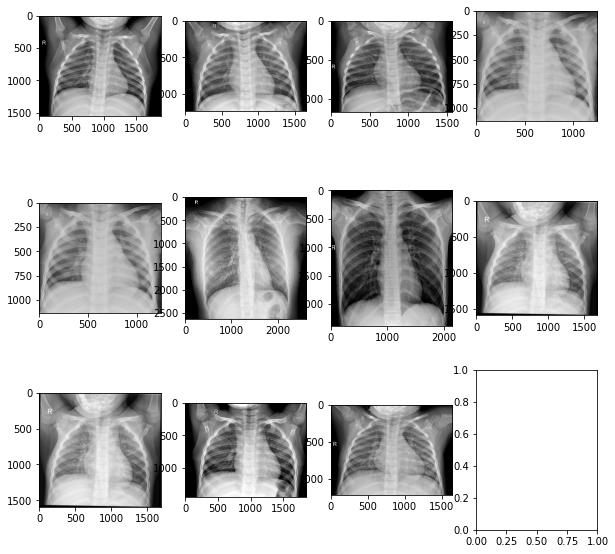

In [76]:
draw_Imgs(img_normal, method='imshow')

# 2. 对比直方图

In [109]:
def get_hist(Imgs):
    '''
    Funtcion:
        - to get the histogram of each img in Imgs
    Parameters:
        - Imgs
    Return:
        - histograms: List
    '''
    histograms = []
    for img in Imgs:
        hist, _ = histogram(img)
        hist = (hist - hist.min()) / (hist.max() - hist.min())
        histograms.append(hist)
    return histograms

In [112]:
histogram_normal = get_hist(img_normal)
histogram_bacteria = get_hist(img_bacteria)
histogram_virus = get_hist(img_virus)

/root/.local/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


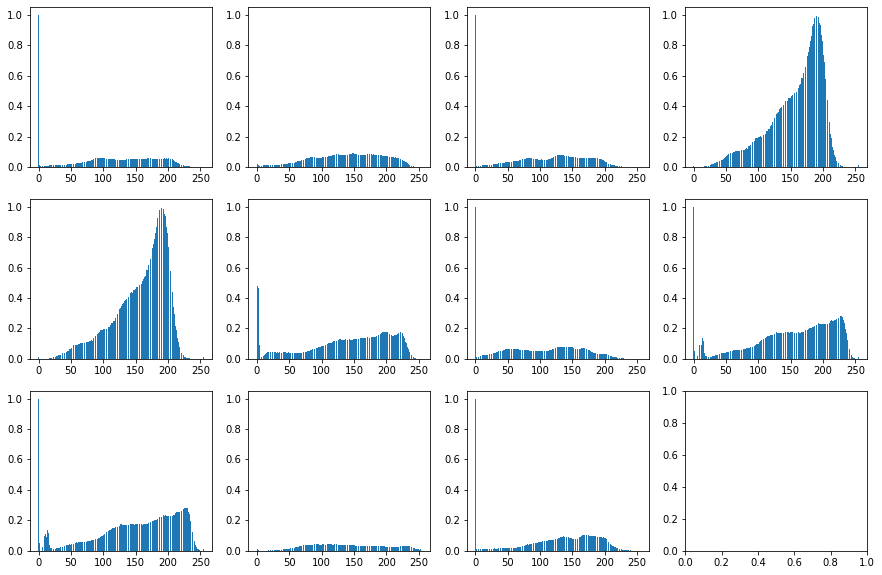

In [121]:
draw_Imgs(histogram_normal, figsize=[15, 10], method='hist')

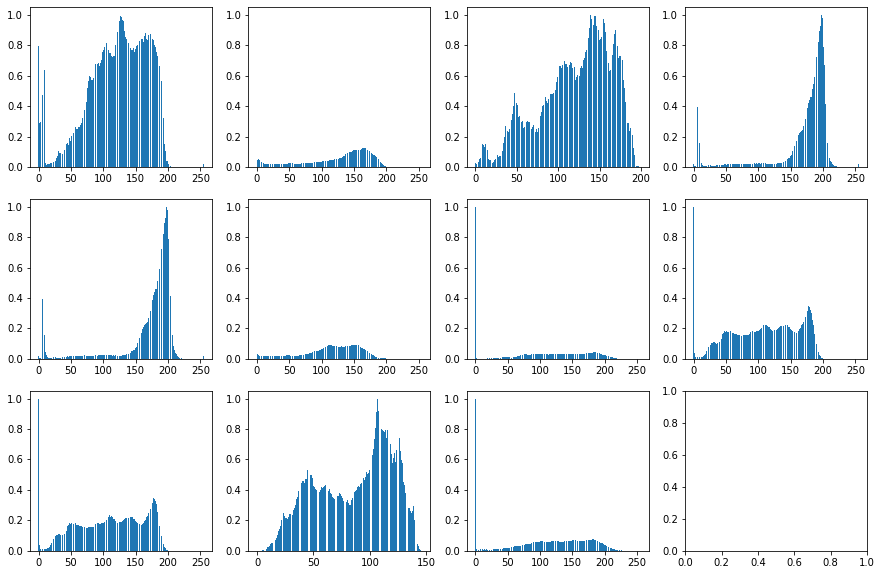

In [122]:
draw_Imgs(histogram_bacteria, figsize=[15, 10], method='hist')

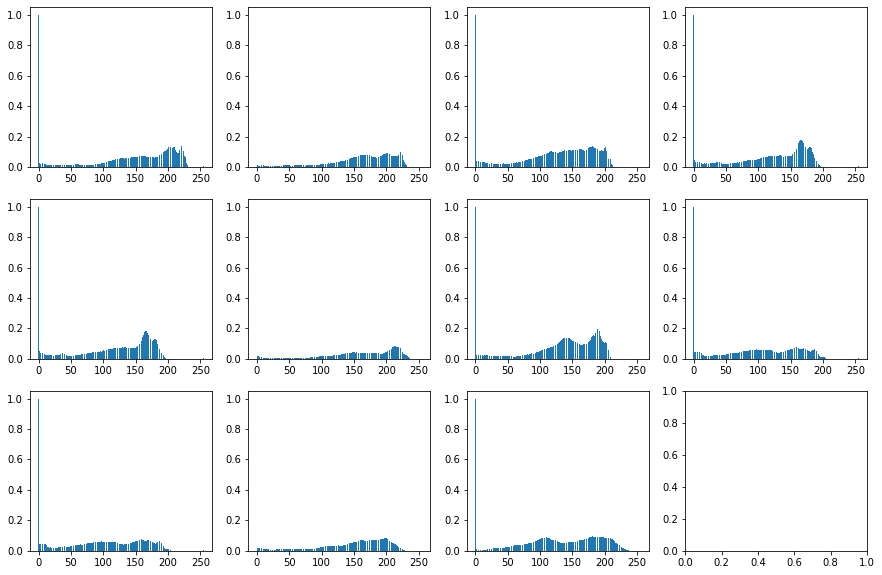

In [123]:
draw_Imgs(histogram_virus, figsize=[15, 10], method='hist')

# 3. 均衡化后对比直方图

In [128]:
def get_hist_equlize(Imgs):
    '''
    Funtcion:
        - to get the histogram of each img in Imgs
    Parameters:
        - Imgs
    Return:
        - histograms: List
    '''
    for i, img in enumerate(Imgs):
        Imgs[i] = equalize_adapthist(img)
    histograms = get_hist(Imgs)
    return histograms

In [129]:
hist_normal_eq = get_hist_equlize(img_normal)

/root/.local/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


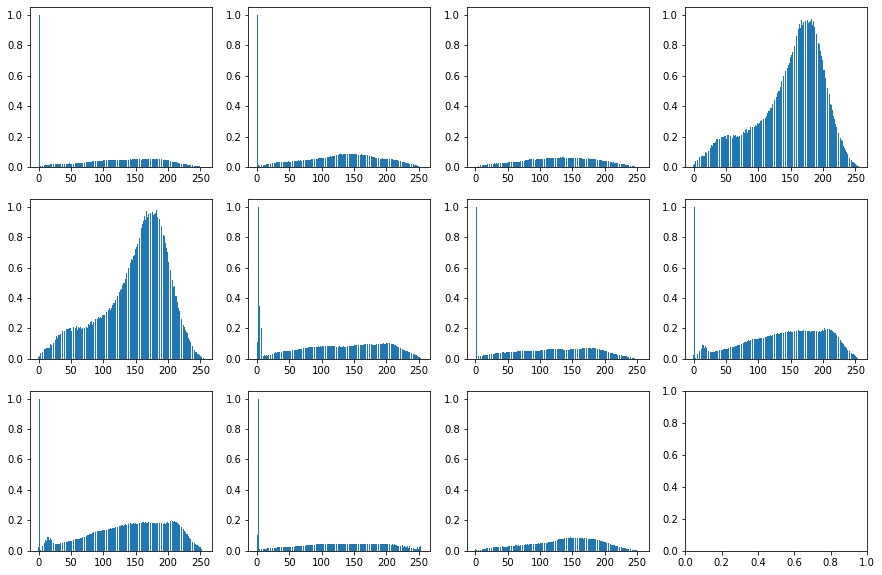

In [130]:
draw_Imgs(hist_normal_eq, figsize=[15, 10], method='hist')

In [131]:
hist_bacteria_eq = get_hist_equlize(img_bacteria)
hist_virus_eq = get_hist_equlize(img_virus)

/root/.local/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


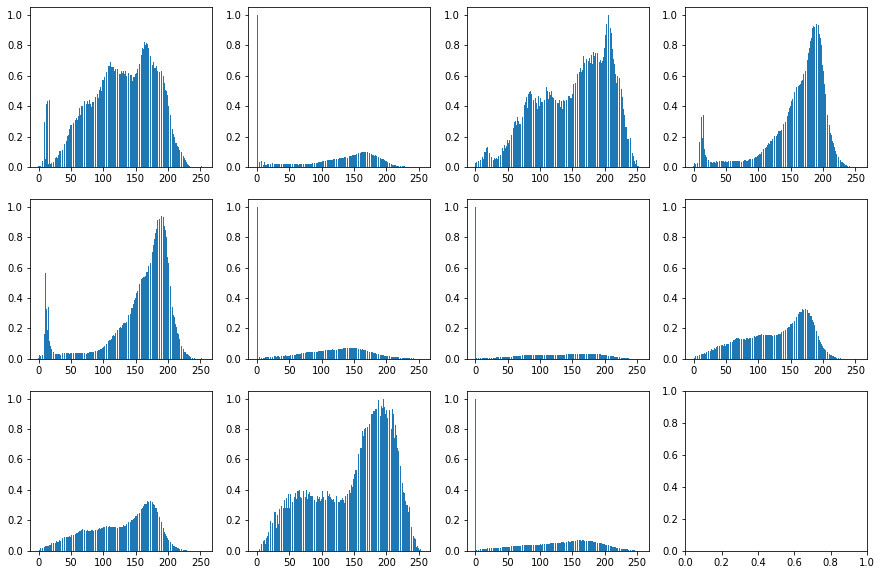

In [132]:
draw_Imgs(hist_bacteria_eq, figsize=[15, 10], method='hist')

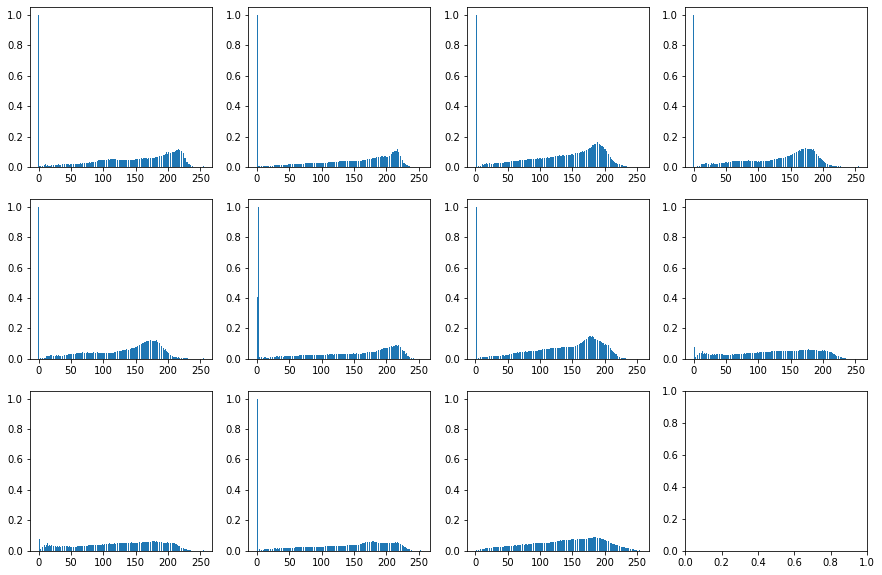

In [133]:
draw_Imgs(hist_virus_eq, figsize=[15, 10], method='hist')